## Packages

In [2]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 5.5 MB 16.1 MB/s 
     |████████████████████████████████| 1.3 MB 53.0 MB/s 
     |████████████████████████████████| 163 kB 63.9 MB/s 
     |████████████████████████████████| 7.6 MB 41.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4116d63a2cfac56f6a37ab52959709138663a5be79b37a351965ee63fe0ad6e9
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [4]:
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# %use matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Data Generation

In [5]:
column_names = ["question", "label_info", "source"]

In [7]:
exp_data = pd.read_csv("Experimental Data for Question Classification train_3000.label.txt", \
                       sep='\t', \
                       encoding = "ISO-8859-1", \
                       header=None)  
exp_data = exp_data[0].str.split(" ", 1, expand=True)
exp_data = exp_data[[1, 0]]
exp_data["source"] = "experiemntal_qna_classification"
exp_data.columns = column_names
exp_data.head()

,question,label_info,source
0,How did serfdom develop in and then leave Russ...,DESC:manner,experiemntal_qna_classification
1,What films featured the character Popeye Doyle ?,ENTY:cremat,experiemntal_qna_classification
2,How can I find a list of celebrities ' real na...,DESC:manner,experiemntal_qna_classification
3,What fowl grabs the spotlight after the Chines...,ENTY:animal,experiemntal_qna_classification
4,What is the full form of .com ?,ABBR:exp,experiemntal_qna_classification


In [8]:
final_data = exp_data
final_data.head()

,question,label_info,source
0,How did serfdom develop in and then leave Russ...,DESC:manner,experiemntal_qna_classification
1,What films featured the character Popeye Doyle ?,ENTY:cremat,experiemntal_qna_classification
2,How can I find a list of celebrities ' real na...,DESC:manner,experiemntal_qna_classification
3,What fowl grabs the spotlight after the Chines...,ENTY:animal,experiemntal_qna_classification
4,What is the full form of .com ?,ABBR:exp,experiemntal_qna_classification


In [9]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    3000 non-null   object
 1   label_info  3000 non-null   object
 2   source      3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [10]:
print(len(np.unique(final_data["label_info"].str.split(":", expand=True)[0].to_numpy())))
print(np.unique(final_data["label_info"].str.split(":", expand=True)[0].to_numpy()))

6
['ABBR' 'DESC' 'ENTY' 'HUM' 'LOC' 'NUM']


In [11]:
print(len(np.unique(final_data["label_info"].to_numpy())))
print(np.unique(final_data["label_info"].to_numpy()))

50
['ABBR:abb' 'ABBR:exp' 'DESC:def' 'DESC:desc' 'DESC:manner' 'DESC:reason'
 'ENTY:animal' 'ENTY:body' 'ENTY:color' 'ENTY:cremat' 'ENTY:currency'
 'ENTY:dismed' 'ENTY:event' 'ENTY:food' 'ENTY:instru' 'ENTY:lang'
 'ENTY:letter' 'ENTY:other' 'ENTY:plant' 'ENTY:product' 'ENTY:religion'
 'ENTY:sport' 'ENTY:substance' 'ENTY:symbol' 'ENTY:techmeth' 'ENTY:termeq'
 'ENTY:veh' 'ENTY:word' 'HUM:desc' 'HUM:gr' 'HUM:ind' 'HUM:title'
 'LOC:city' 'LOC:country' 'LOC:mount' 'LOC:other' 'LOC:state' 'NUM:code'
 'NUM:count' 'NUM:date' 'NUM:dist' 'NUM:money' 'NUM:ord' 'NUM:other'
 'NUM:perc' 'NUM:period' 'NUM:speed' 'NUM:temp' 'NUM:volsize' 'NUM:weight']


## Sentence Transformer Model - all-mpnet-base-v2

In [12]:
sentTransformerModel = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

### Generate Embeddings

In [13]:
questionEmbeddings = sentTransformerModel.encode(final_data["question"].to_numpy())

In [14]:
questionEmbeddings.shape

(3000, 768)

In [16]:
np.save(file="qna_3000_emebddings", arr = questionEmbeddings)

## Visualization

In [18]:
pca = PCA(n_components=3)
dimReducer = pca.fit(questionEmbeddings)
X_r = dimReducer.transform(X=questionEmbeddings)
# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

In [19]:
print(pca.explained_variance_ratio_)

[0.0371138  0.03278541 0.02146814]


In [20]:
print(pca.singular_values_)

[9.872572  9.2790365 7.508615 ]


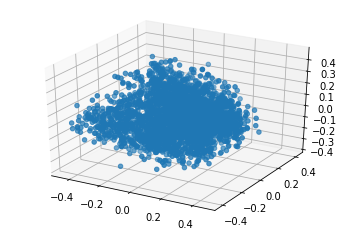

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_r[:,0], X_r[:,1],X_r[:,2])
plt.show()

## Clustering


### KMeans

In [24]:
X = questionEmbeddings
X = StandardScaler().fit_transform(X)

In [39]:
labels_true = final_data["label_info"].to_numpy()
K_clusters = 50 

# labels_true = final_data["label_info"].str.split(":", expand=True)[0].to_numpy()
# K_clusters = 6 

In [40]:
kmeans = KMeans(n_clusters=K_clusters, random_state=0).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 50
Estimated number of noise points: 0
Homogeneity: 0.437
Completeness: 0.361
V-measure: 0.395
Adjusted Rand Index: 0.106
Adjusted Mutual Information: 0.330
Silhouette Coefficient: 0.032


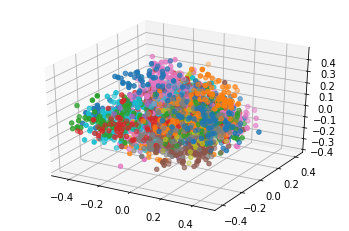

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

rough_df = pd.DataFrame(dict(x=X_r[:,0], y=X_r[:,1], z=X_r[:,2], label=labels))

groups = rough_df.groupby('label')

for name, group in groups: 
  ax.scatter(group.x, group.y, group.z, marker='o', label=name)
# ax.legend()

plt.show()

In [50]:
unique, counts = np.unique(labels, return_counts=True)
freq_chart = np.asarray((unique, counts)).T
freq_chart[freq_chart[:, 1].argsort()]
# freq_chart

array([[ 44,  26],
       [  4,  27],
       [ 22,  32],
       [ 19,  38],
       [ 25,  39],
       [ 14,  39],
       [  8,  39],
       [ 28,  39],
       [ 24,  40],
       [  2,  40],
       [ 39,  41],
       [ 45,  42],
       [  1,  42],
       [ 36,  43],
       [ 20,  49],
       [ 40,  50],
       [ 21,  50],
       [  5,  51],
       [ 32,  52],
       [ 47,  53],
       [ 41,  55],
       [ 13,  55],
       [ 18,  56],
       [  9,  56],
       [ 26,  57],
       [ 37,  58],
       [ 33,  58],
       [ 10,  59],
       [  3,  60],
       [ 31,  60],
       [ 11,  61],
       [ 46,  63],
       [ 34,  65],
       [ 43,  66],
       [ 49,  68],
       [ 42,  70],
       [ 27,  72],
       [ 17,  72],
       [ 38,  75],
       [  7,  75],
       [ 16,  76],
       [ 35,  78],
       [ 23,  81],
       [ 30,  81],
       [ 12,  87],
       [ 48,  90],
       [  6,  96],
       [  0,  99],
       [ 29, 106],
       [ 15, 113]])

In [52]:
(labels==15).shape

(3000,)

In [58]:
final_data.iloc[(labels==44),0:2]

,question,label_info
14,What is considered the costliest disaster the ...,ENTY:event
33,Which company that manufactures video-game har...,HUM:gr
128,What piano company claims its product is the `...,HUM:gr
165,Which Japanese car maker had its biggest perce...,HUM:gr
229,How much does a new railroad coal car cost ?,NUM:money
309,What is the fastest commercial automobile that...,ENTY:other
344,Who is the leading competitor of Trans Union C...,HUM:gr
381,What is the abbreviation of the company name `...,ABBR:abb
487,What stereo manufacturer is `` Slightly ahead ...,HUM:gr
499,Which oil company almost picked a word that me...,HUM:gr


### DBSCAN

In [ ]:
X = questionEmbeddings
X = StandardScaler().fit_transform(X)
labels_true = final_data["label_info"].to_numpy()
# labels_true = final_data["label_info"].str.split(":", expand=True)[0].to_numpy()

In [ ]:
db = DBSCAN(eps=10.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))